In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 92% 207M/225M [00:01<00:00, 151MB/s]
100% 225M/225M [00:01<00:00, 150MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/flowers-recognition.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [5]:
data=[]

In [6]:
file_name=os.listdir('/content/flowers')
print(file_name)
print(len(file_name))

['tulip', 'dandelion', 'daisy', 'sunflower', 'rose']
5


In [7]:
daisy_flowers=os.listdir('/content/flowers/daisy')
print(daisy_flowers)
print(len(daisy_flowers))

['34727863665_b00ac77266_n.jpg', '799952628_bf836677fa_n.jpg', '6207492986_0ff91f3296.jpg', '6136947177_47ff445eb4_n.jpg', '754296579_30a9ae018c_n.jpg', '2908212142_5437fa67ff_n.jpg', '6299910262_336309ffa5_n.jpg', '2646438199_b309cffd65_n.jpg', '34530932101_957fab3650_n.jpg', '5684911529_88a7ae32ba_n.jpg', '7133935763_82b17c8e1b_n.jpg', '7320089276_87b544e341.jpg', '5981645737_29eceac291_m.jpg', '33814092924_b23d019011_n.jpg', '3410906335_37e8a24b1c_n.jpg', '7191221492_610035de7c_m.jpg', '33918001783_06a692e371_n.jpg', '16121105382_b96251e506_m.jpg', '5948835387_5a98d39eff_m.jpg', '3963330924_6c6a3fa7be_n.jpg', '2488902131_3417698611_n.jpg', '7377004908_5bc0cde347_n.jpg', '10466558316_a7198b87e2.jpg', '33887503434_a2762228f4_n.jpg', '20580471306_ab5a011b15_n.jpg', '5811226952_4650ed70ae_n.jpg', '9161647994_e39b65cb9c_n.jpg', '14613443462_d4ed356201.jpg', '294451721_5106537b34.jpg', '33809956124_b49dcddf8f_n.jpg', '7630520686_e3a61ac763.jpg', '15029936576_8d6f96c72c_n.jpg', '3459067723

In [8]:
for i in range(764):
  img_path='/content/flowers/daisy/'+daisy_flowers[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((64,64))
  img_arr=np.array(img_resize)
  data.append([img_arr,1])

In [9]:
len(data)

764

In [10]:
dandelion_flowers=os.listdir('/content/flowers/dandelion')
print(dandelion_flowers)
print(len(dandelion_flowers))

['14576445793_582aa6446b_m.jpg', '9818247_e2eac18894.jpg', '33857574164_b0b724b567_n.jpg', '4589787911_851cb80157_n.jpg', '2019520447_48b2354a20_m.jpg', '177851662_b2622b4238_n.jpg', '34335432530_cd667cbb19_n.jpg', '8989067485_aab399460b_n.jpg', '34587934371_1a0429111e_n.jpg', '6972675188_37f1f1d6f6.jpg', '33914172633_592a6eb74f_n.jpg', '10617162044_8740d4dd9f_n.jpg', '3149809654_6a4b31314d_n.jpg', '2521811279_1f7fc353bf_n.jpg', '4713958242_fbcfe9a61b_m.jpg', '2596413098_7ef69b7e1d_m.jpg', '8533312924_ee09412645_n.jpg', '10946896405_81d2d50941_m.jpg', '5110102140_787d325757_n.jpg', '4629844753_4e02015d29_m.jpg', '19961979110_fcd8092388_m.jpg', '17570530696_6a497298ee_n.jpg', '14185089716_2a48298d17.jpg', '16096748028_7876887ab2.jpg', '3393564906_f2df184b76_n.jpg', '33869330174_b259025135_n.jpg', '9965757055_ff01b5ee6f_n.jpg', '33877585464_b23cefb361_n.jpg', '2540640433_dedd577263.jpg', '19064700925_b93d474e37.jpg', '510677438_73e4b91c95_m.jpg', '3505026222_c760df0035_n.jpg', '207614145

In [11]:
for i in range(1052):
  img_path='/content/flowers/dandelion/'+dandelion_flowers[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((64,64))
  img_arr=np.array(img_resize)
  data.append([img_arr,2])

In [12]:
len(data)

1816

In [13]:
rose_flowers=os.listdir('/content/flowers/rose')
print(rose_flowers)
print(len(rose_flowers))

['8987479080_32ab912d10_n.jpg', '2535466143_5823e48b63.jpg', '5335945309_852d018a27_n.jpg', '17302463621_d82be11f01_n.jpg', '9353111163_7a89b2df35_n.jpg', '5002456992_4da0df247a_n.jpg', '4754734410_94d98463a5.jpg', '8035908422_87220425d2_n.jpg', '16525204061_9b47be3726_m.jpg', '6936225976_a91b60d8c2_m.jpg', '6969041818_a505baa68e_m.jpg', '32724693914_282ccc4f92_n.jpg', '5360769702_ec28c53b9e_n.jpg', '15996816031_7f2fea25cb_n.jpg', '22385375599_1faf334f5d_n.jpg', '1540738662_7b4152e344_m.jpg', '15972976206_d32feeb79b_n.jpg', '8983268106_dc913d17d8_m.jpg', '1645761726_2b1be95472.jpg', '685724528_6cd5cbe203.jpg', '14019883858_e5d2a0ec10_n.jpg', '5001855689_e07486c44d_n.jpg', '15424480096_45bb574b33.jpg', '5001854803_cb87747d4a_n.jpg', '5349251139_92539c279a_n.jpg', '8063462557_e0a8bd6c64_n.jpg', '7461898754_9032a38963_n.jpg', '110472418_87b6a3aa98_m.jpg', '5335936115_0292d0beef_n.jpg', '19440805164_920b28da61_n.jpg', '159079265_d77a9ac920_n.jpg', '5002446424_b86e3c646f_n.jpg', '1194495768

In [14]:
for i in range(784):
  img_path='/content/flowers/rose/'+rose_flowers[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((64,64))
  img_arr=np.array(img_resize)
  data.append([img_arr,3])

In [15]:
len(data)

2600

In [16]:
sunflower_flowers=os.listdir('/content/flowers/sunflower')
print(sunflower_flowers)
print(len(sunflower_flowers))

['6606817351_10f6e43a09.jpg', '4528959364_fa544b0f4e_m.jpg', '15472217046_2699b25584.jpg', '210076535_80951bc5d5.jpg', '4673984698_6ec14d5b79.jpg', '5955475577_3d923874d9_n.jpg', '40411100_7fbe10ec0f_n.jpg', '6056460102_f5569092a6_n.jpg', '6606749757_b98a4ba403.jpg', '4341530649_c17bbc5d01.jpg', '6140892289_92805cc590.jpg', '14925397651_97dcddc383_n.jpg', '9538283930_0faea083bb_n.jpg', '2697194548_ec8f8de97c_n.jpg', '200288046_0032f322ff_n.jpg', '20022771089_3cc7e5086d_m.jpg', '201809908_0ef84bb351.jpg', '10386522775_4f8c616999_m.jpg', '3001533700_1c62fb8b4a_n.jpg', '9483429732_5ae73eb672_n.jpg', '6198569425_e953b9e6cc_m.jpg', '5037531593_e2daf4c7f1.jpg', '16975010069_7afd290657_m.jpg', '19442589512_e733cfea0f.jpg', '3846717708_ea11383ed8.jpg', '14698136411_23bdcff7bf_n.jpg', '4664737020_b4c61aacd3_n.jpg', '12323859023_447387dbf0_n.jpg', '9460336948_6ae968be93.jpg', '4933823194_33f6e32c5a.jpg', '3311874685_7b9ef10f7e_m.jpg', '4821232343_7e0bcfbfdf_n.jpg', '34571252122_b3b1f45fac_n.jpg'

In [17]:
for i in range(733):
  img_path='/content/flowers/sunflower/'+sunflower_flowers[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((64,64))
  img_arr=np.array(img_resize)
  data.append([img_arr,4])

In [18]:
len(data)

3333

In [19]:
tulip_flowers=os.listdir('/content/flowers/tulip')
print(tulip_flowers)
print(len(tulip_flowers))

['5717950215_5d0bf2e8b3_n.jpg', '3254533919_cb0b8af26c.jpg', '4550091966_7f3e0f8802_n.jpg', '13976522214_ccec508fe7.jpg', '2434178332_7fcf85aa95_n.jpg', '14027372499_30f934d24f_m.jpg', '20489160931_3c445b6b02_n.jpg', '17202535346_ab828e779b.jpg', '26685648806_c76dd583b9_n.jpg', '2256214682_130c01d9d9.jpg', '25965526231_941b6a216d_n.jpg', '15516736553_b169b67195_n.jpg', '9446982168_06c4d71da3_n.jpg', '16133946004_2e935d9433_n.jpg', '7166596680_a01961a618_n.jpg', '14671196461_b725727229_m.jpg', '20535484712_8fc5c2a4e8_n.jpg', '14069874230_b7c742112a_n.jpg', '14054827391_139fb54432.jpg', '15090146325_b7e1249e60.jpg', '5717950291_af2aed83d8_n.jpg', '16862374316_4135908d4c_m.jpg', '14651383746_419dc73634_m.jpg', '14046760909_0c73e84a1f_n.jpg', '8585101979_4398146bf1_n.jpg', '8673416556_639f5c88f1_n.jpg', '19892310888_9bbdec4ea7_n.jpg', '19914611213_150f7125a9_n.jpg', '14069841138_e2b403f44f_n.jpg', '5698944116_fd35fe6bea.jpg', '5674695558_61397a1584.jpg', '5717951019_739d8307d4_n.jpg', '207

In [20]:
for i in range(984):
  img_path='/content/flowers/tulip/'+tulip_flowers[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((64,64))
  img_arr=np.array(img_resize)
  data.append([img_arr,5])

In [21]:
len(data)

4317

In [22]:
x=[]
y=[]
for i,j in data:
  x.append(i)
  y.append(j)

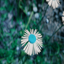

In [23]:
cv2_imshow(x[0])

In [24]:
print(y[0])

1


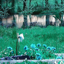

In [25]:
cv2_imshow(x[765])

In [26]:
print(y[765])

2


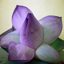

In [27]:
cv2_imshow(x[1817])

In [28]:
print(y[1817])

3


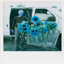

In [29]:
cv2_imshow(x[2601])

In [30]:
print(y[2601])

4


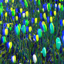

In [31]:
cv2_imshow(x[3334])

In [32]:
print(y[3334])

5


In [33]:
import random
random.shuffle(data)

In [34]:
x1=[]
y1=[]
for i,j in data:
  x1.append(i)
  y1.append(j)

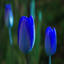

In [35]:
cv2_imshow(x1[0])

In [36]:
print(y1[0])

5


In [37]:
x1=np.array(x1)
y1=np.array(y1)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=2)

In [39]:
print(len(x_train),len(x_test))

3453 864


In [40]:
print(len(y_train),len(y_test))

3453 864


In [41]:
print(x_train.shape,x_test.shape)

(3453, 64, 64, 3) (864, 64, 64, 3)


In [42]:
print(type(x_train))

<class 'numpy.ndarray'>


In [43]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [44]:
x_train_scaled[0]

array([[[0.27058824, 0.34117647, 0.19607843],
        [0.20392157, 0.27058824, 0.1254902 ],
        [0.15686275, 0.21176471, 0.04705882],
        ...,
        [0.23529412, 0.22745098, 0.08235294],
        [0.14901961, 0.16470588, 0.04313725],
        [0.12156863, 0.14901961, 0.03137255]],

       [[0.2627451 , 0.33333333, 0.18823529],
        [0.19607843, 0.25882353, 0.11764706],
        [0.14509804, 0.2       , 0.03921569],
        ...,
        [0.23529412, 0.24705882, 0.09019608],
        [0.16078431, 0.18431373, 0.05098039],
        [0.14509804, 0.17254902, 0.03921569]],

       [[0.25490196, 0.3254902 , 0.18039216],
        [0.19607843, 0.2627451 , 0.11764706],
        [0.18039216, 0.23137255, 0.05490196],
        ...,
        [0.24705882, 0.2745098 , 0.11372549],
        [0.18039216, 0.21176471, 0.0627451 ],
        [0.17254902, 0.19607843, 0.05882353]],

       ...,

       [[0.07843137, 0.09803922, 0.01568627],
        [0.21176471, 0.25882353, 0.0745098 ],
        [0.33333333, 0

In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6,activation='softmax')
])

In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
num_of_classes=6
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [49]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(x_train_scaled,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
98/98 [==============================] - 12s 11ms/step - loss: 1.5856 - accuracy: 0.2967 - val_loss: 1.3292 - val_accuracy: 0.4220
Epoch 2/20
98/98 [==============================] - 1s 7ms/step - loss: 1.3287 - accuracy: 0.4297 - val_loss: 1.1723 - val_accuracy: 0.5520
Epoch 3/20
98/98 [==============================] - 1s 7ms/step - loss: 1.1782 - accuracy: 0.5214 - val_loss: 1.0670 - val_accuracy: 0.5954
Epoch 4/20
98/98 [==============================] - 1s 7ms/step - loss: 1.0714 - accuracy: 0.5742 - val_loss: 1.0707 - val_accuracy: 0.5665
Epoch 5/20
98/98 [==============================] - 1s 7ms/step - loss: 0.9812 - accuracy: 0.6173 - val_loss: 0.9581 - val_accuracy: 0.6387
Epoch 6/20
98/98 [==============================] - 1s 7ms/step - loss: 0.8810 - accuracy: 0.6563 - val_loss: 1.0392 - val_accuracy: 0.5983
Epoch 7/20
98/98 [==============================] - 1s 7ms/step - loss: 0.8076 - accuracy: 0.6894 - val_loss: 0.9829 - val_accuracy: 0.6561
Epoch 8/20
98/98 [

1/1 [==============================] - 0s 120ms/step
The flower u picked is ROSE


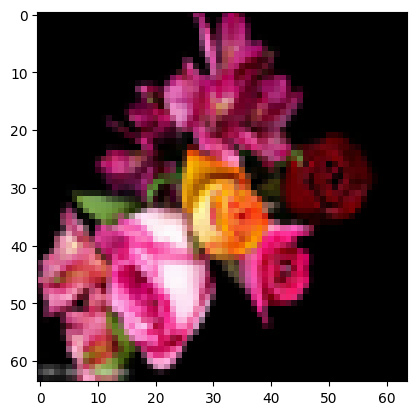

In [55]:
input_image_path='/content/flowers/rose/11233672494_d8bf0a3dbf_n.jpg'
img_pillow=Image.open(input_image_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((64,64))
img_arr=np.array(img_resize)
img_scaled=img_arr/255
img_reshaped=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshaped)
output=np.argmax(prediction)
plt.imshow(img_arr)
if(output==1):
  print('The flower u picked is DAISY')
elif(output==2):
  print('The flower u picked is DANDELION')
elif(output==3):
  print('The flower u picked is ROSE')
elif(output==4):
  print('The flower u picked is SUNFLOWER')
elif(output==5):
  print('The flower u picked is TULIP')
else:
  print('Sorry we did not found the name of the flower')